
# Analysis on Customer Hotel Reservations

#### This dataset was downloaded from kaggle.com
#### By Daniel Payan

In this notebook, we will **manipulate**, **analyze**, and **visualize** customer hotel passenger data to draw insights on what the biggest influencers on honoring reservations are, such as, length of stay, number of people in the party, and lead time (# of days between booking and arrival date). <br>
This EDA will be **part 1** of this project, with **part 2** being located in my [Machine-Learning Repo](https://github.com/danielpayan13/Project-Portfolio/tree/main/Machine-Learning) under the same project name. <br>
(Part 2 will cover the utilization of Machine Learning models to predict whether or not a guest will honor their reservation, as well as which factors have the greatest influence on this.)

This notebook has one CSV file, **Hotel Reservations.csv**, which will be stored using a pandas DataFrame. For data visualization we will be using seaborn and numpy for mathematical functions.

In [42]:
import pandas as pd
import seaborn as sb
import numpy as np

In [43]:
#Read data into pandas DataFrame
hotel_df = pd.read_csv('Data/Hotel Reservations.csv')
#The dataset has 36275 records with 19 attributes
hotel_df.shape

(36275, 19)

#### First let's display the dataset to get an overall look at our data.

In [44]:
hotel_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


#### Here we get attribute info, in which we see we have:
> 5 categorical (object) attributes <br> & <br> 14 numerical (float/int) attributes

In [45]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Here we get a more detailed look at our numerical attributes.
For example, we can see the standard deviation within each column, the mean value, percentile values, and also the min/max values. <br>
**Now we know the maximum # of children in our dataset is 10, the average week nights booked is ~2, and the maximum lead time is 443 days.**

In [46]:
hotel_df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [47]:
#Now let's see the distribution of honored vs. cancelled reservations
hotel_df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [49]:
#Now we can map these satisfaction values to a binary outcome,
#1 being honored reservationsand 0 being canceled reservations
map_values = {'booking_status':{'Canceled':1,'Not_Canceled':0}}
hotel_df = hotel_df.replace(map_values)
#Let's check to make sure our mapping values went through
hotel_df['booking_status'].head(10)

0    0
1    0
2    1
3    1
4    1
5    1
6    0
7    0
8    0
9    0
Name: booking_status, dtype: int64

#### Now that we have some information on our dataset, let's try and identify any correlation between our attributes and our outcome variable, 'booking_status', using a heatmap

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_21788\710255416.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = hotel_df.corr()


[Text(0.5, 1.0, 'Correlation of Attributes')]

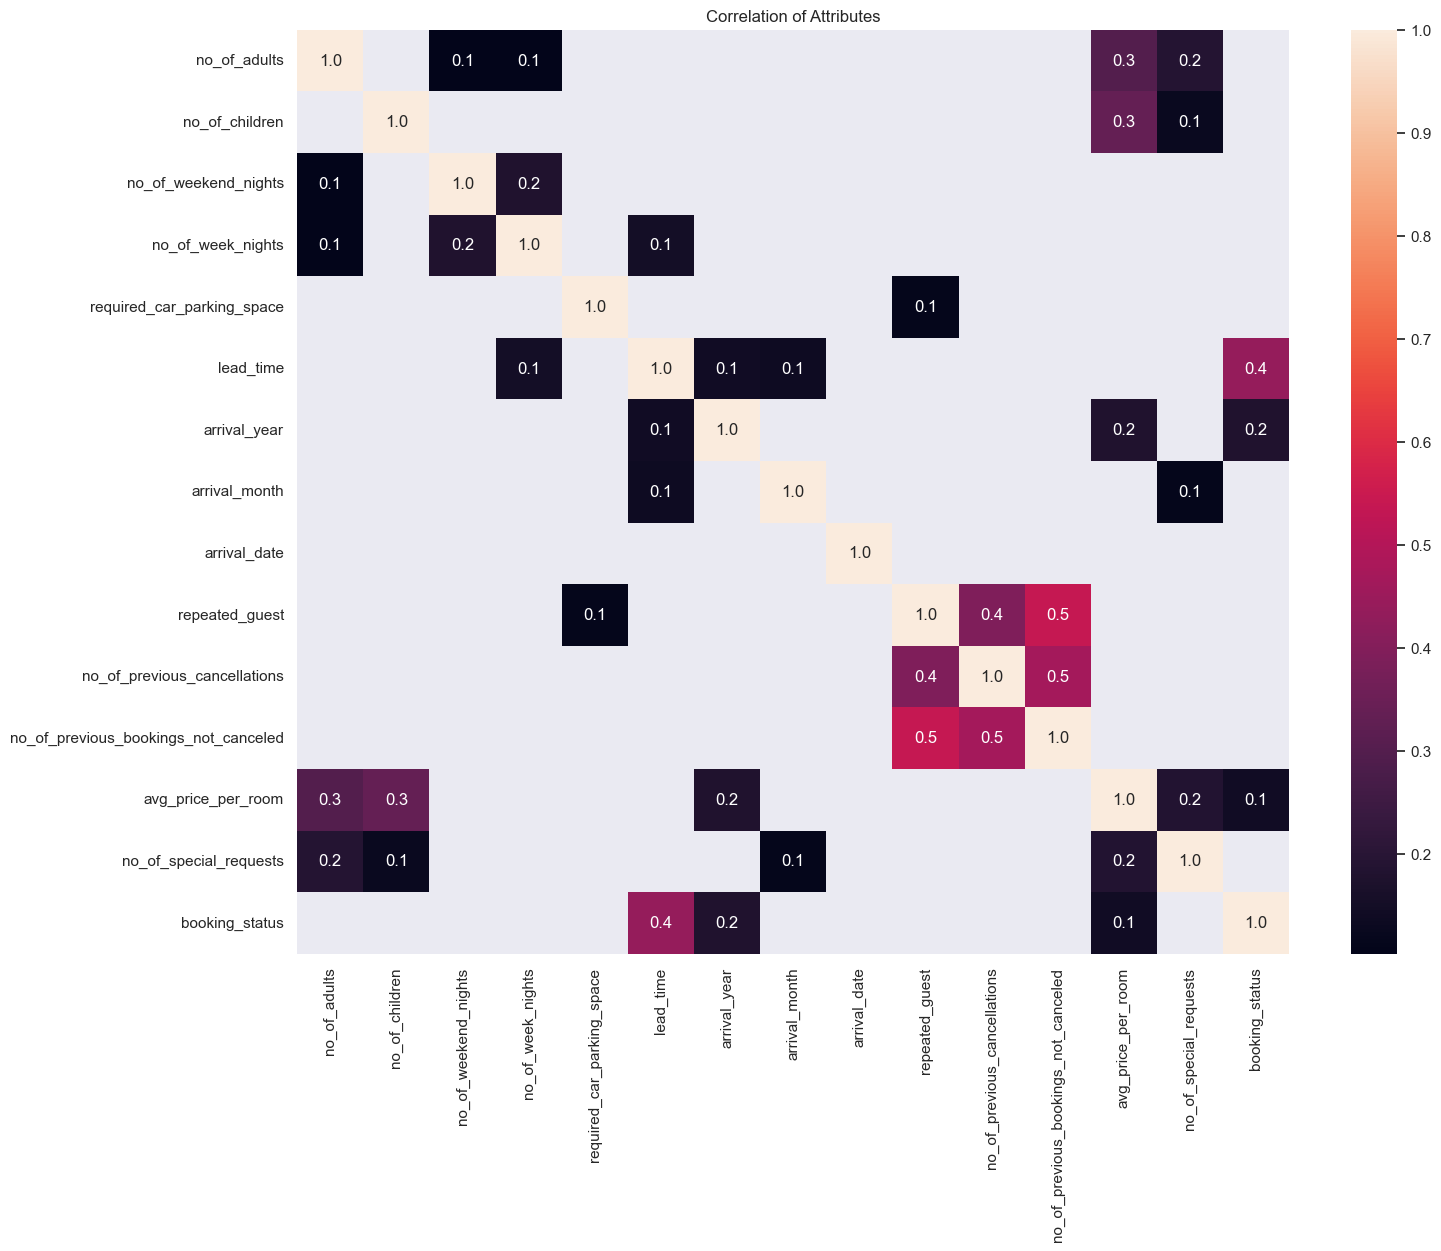

In [50]:
corr_matrix = hotel_df.corr()
#This mask will allow us to determine a threshold, in this case 0.1,
#in which all values under this threshold will not be colored
mask = np.zeros_like(corr_matrix)
mask[corr_matrix<0.1] = True
sb.set(rc={'figure.figsize':(16,12)})
sb.heatmap(corr_matrix,mask=mask,annot=True,fmt=".1f").set(title='Correlation of Attributes')

#### What did the heatmap show?
The heatmap revealed that there are not many attributes with a correlation greater that 0.1 with booking status. The **highest correlating attribute to booking status is the number of special requests a guest makes (at 0.3)**. The number of previous bookings canceled/not canceled have the highest correlations on the heatmap with the repeated guest attribute. (Which makes sense, at previous bookings would require a customer to be a repeated guest)

#### Next we'll graph some histograms to get an understanding of the distributions of our attributes

[Text(0.5, 1.0, 'Distribution of Lead Time By Booking Status')]

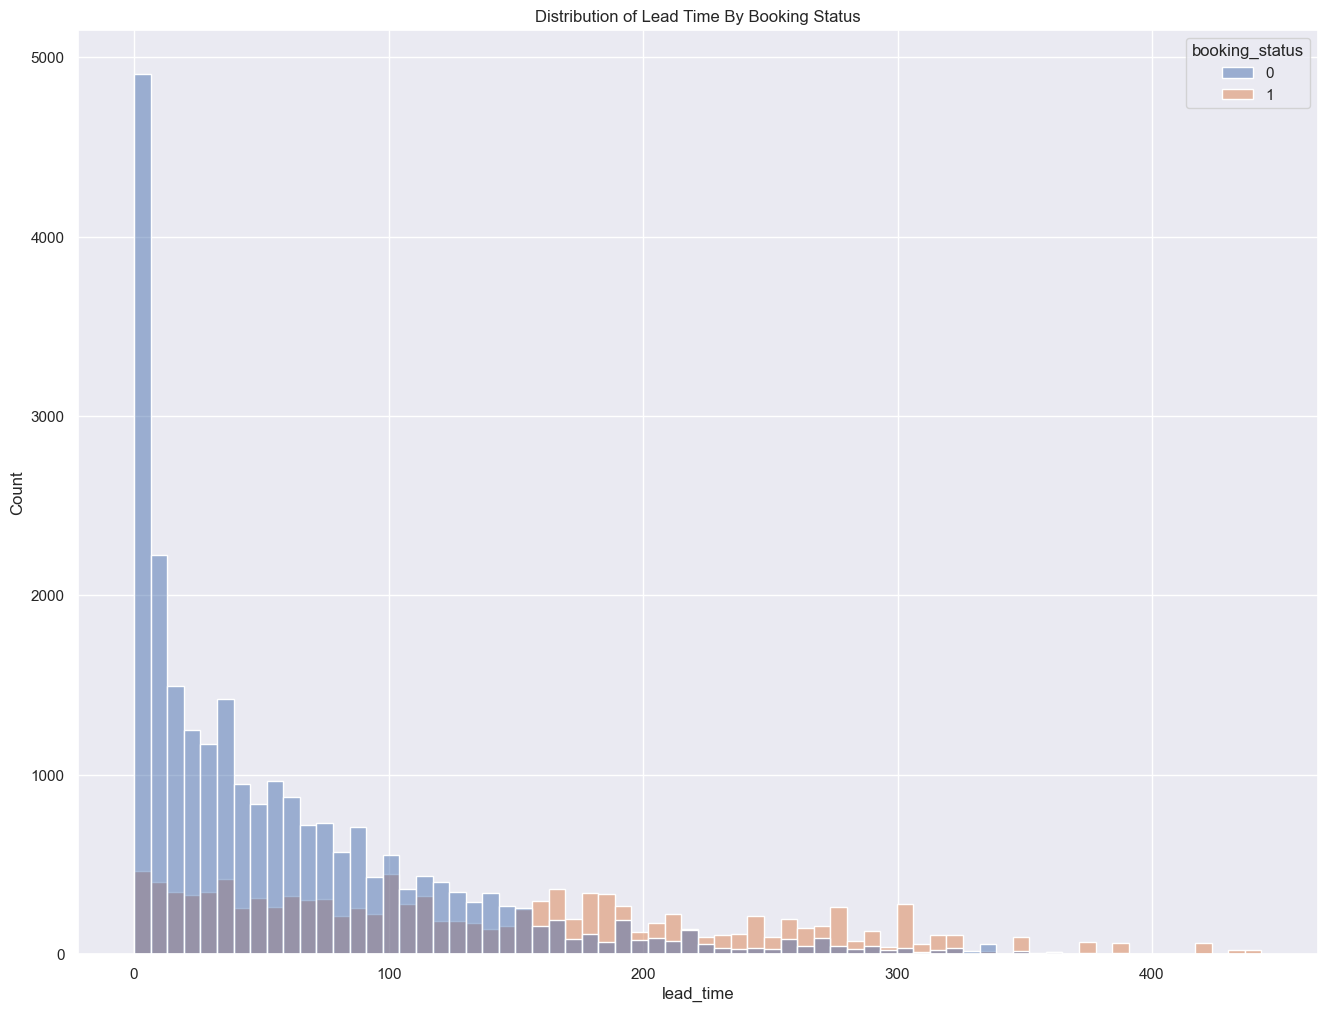

In [53]:
sb.histplot(data=hotel_df,x='lead_time',hue='booking_status').set(title='Distribution of Lead Time By Booking Status')

[Text(0.5, 1.0, 'Distribution of Room Prices')]

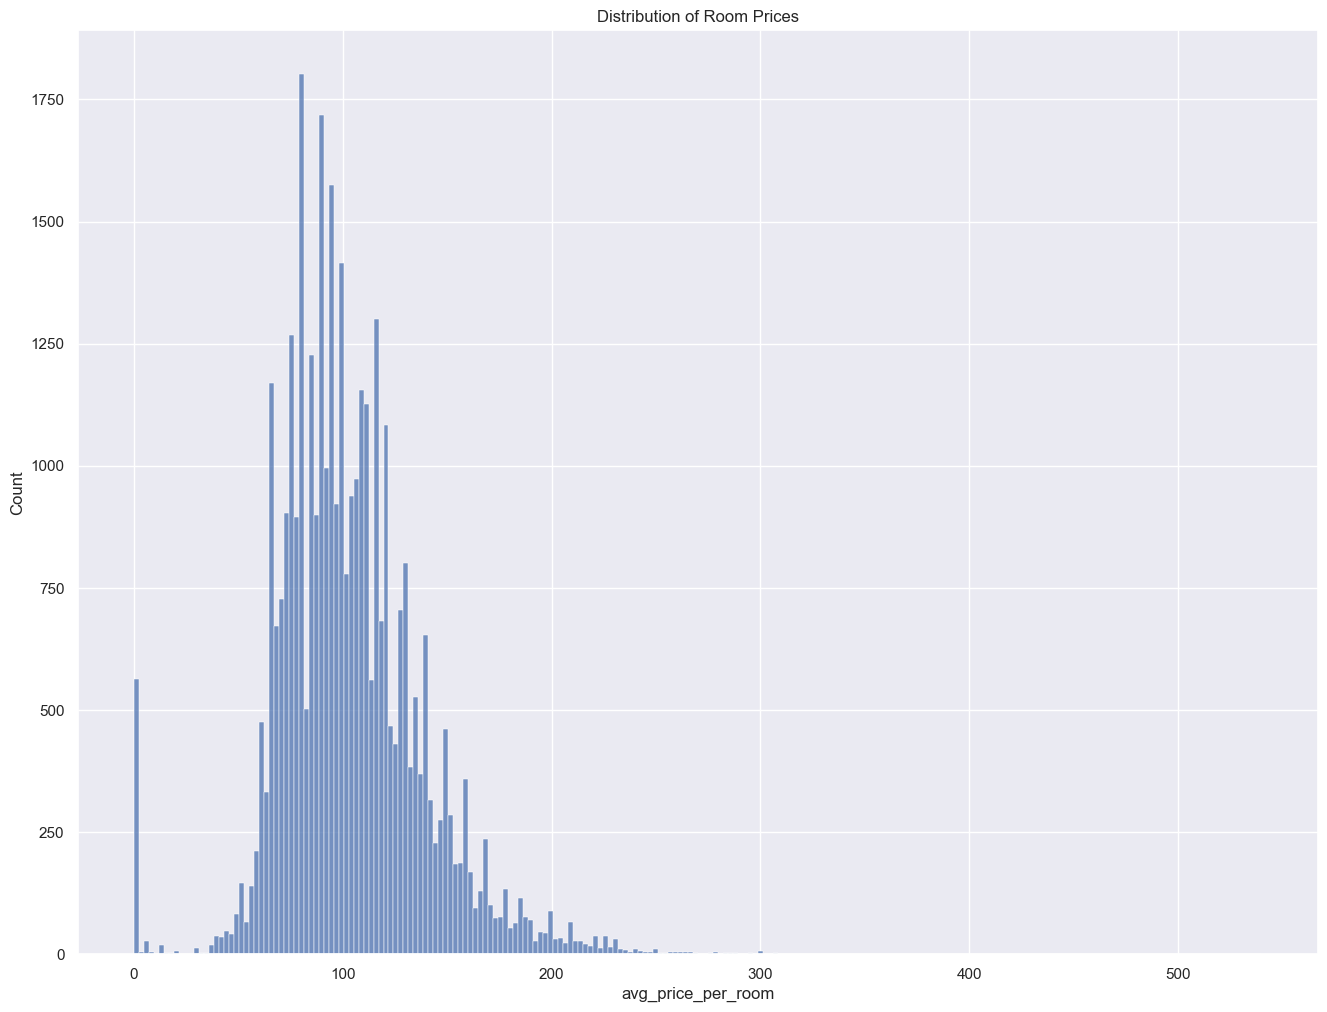

In [57]:
sb.histplot(data=hotel_df,x='avg_price_per_room').set(title='Distribution of Room Prices')

#### What did the histograms show?
The distribution of lead time by booking status reflected that for bookings that were made with **over 150 days of lead time, were often canceled**. This means that the less time between booking and arrival tends to result in the guest honoring their reservation. <br>
The **distribution of room prices reflects that the distribution is primarily around 100 dollars**, however there are a **large number of rooms that cost 0 dollars, so this may reflect customer deals or membership points being utilized frequently.**

[Text(0.5, 1.0, 'Avg. Room Price vs. Lead Time by Booking Status')]

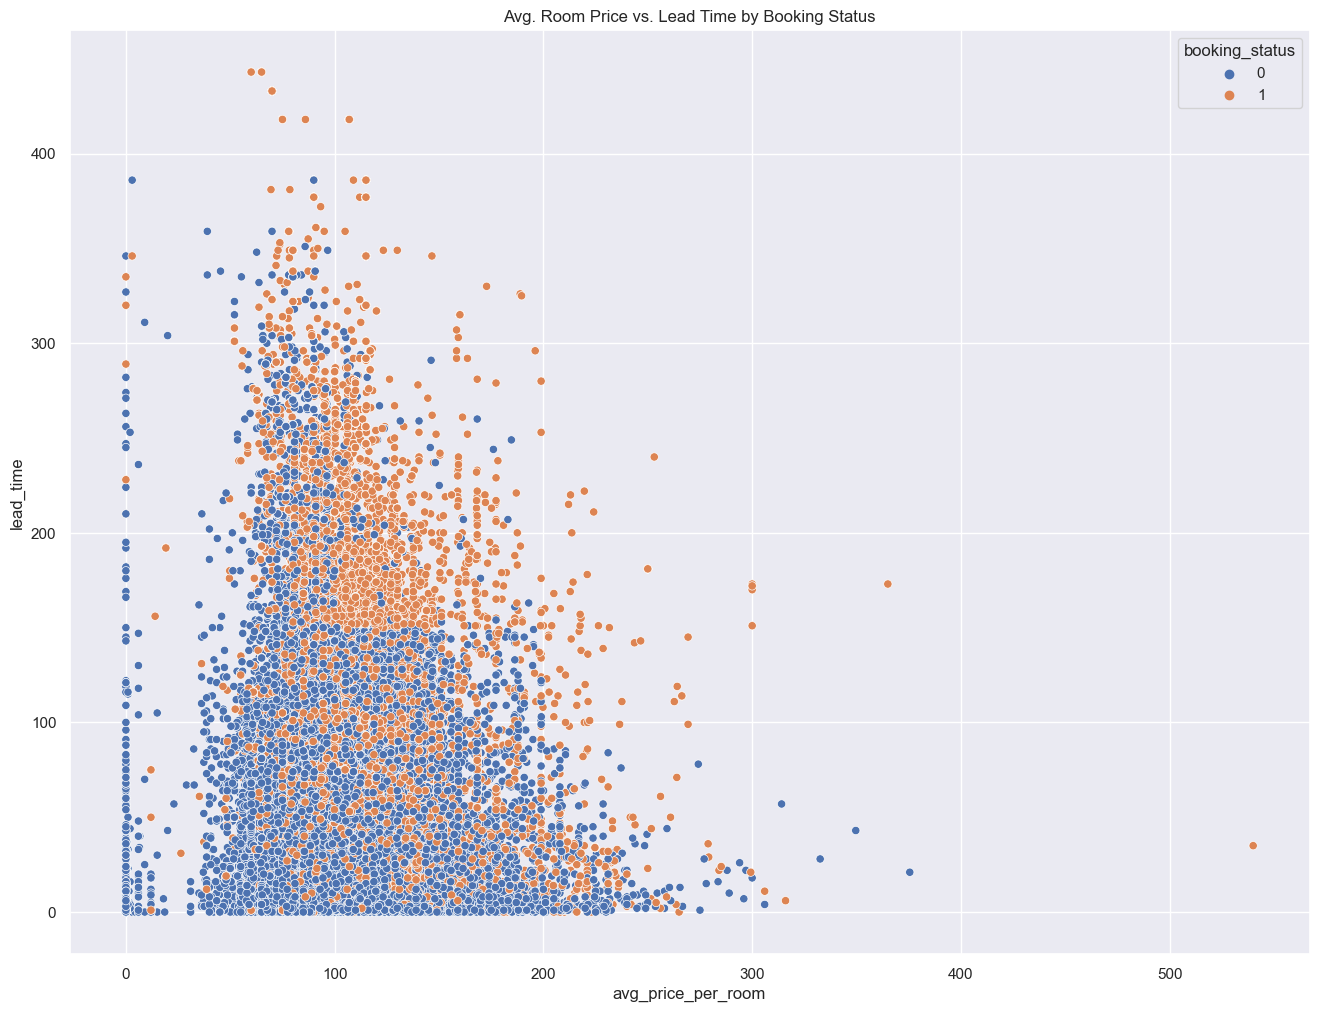

In [60]:
sb.scatterplot(data=hotel_df,x='avg_price_per_room',y='lead_time',hue='booking_status').set(title='Avg. Room Price vs. Lead Time by Booking Status')

[Text(0.5, 1.0, 'Avg. Room Price vs. Lead Time by Market Segment Type')]

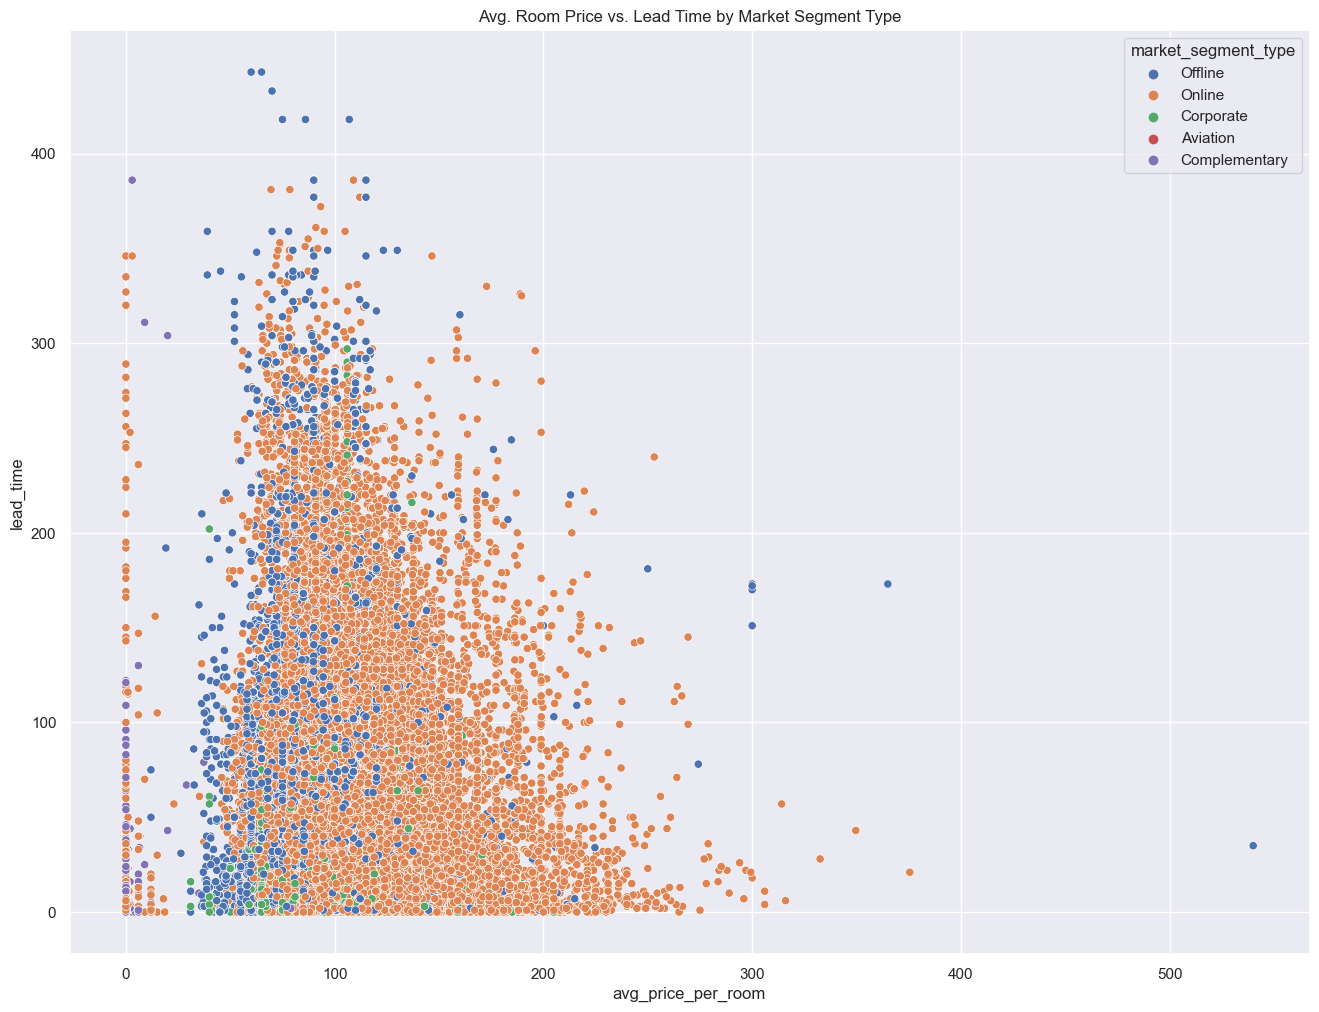

In [65]:
sb.scatterplot(data=hotel_df,x='avg_price_per_room',y='lead_time',hue='market_segment_type').set(title='Avg. Room Price vs. Lead Time by Market Segment Type')

#### What did these scatterplots show?
The first scatterplot reflects the insight we learned earlier where **lead times greater than 150 days led to a higher number of cancellations.**

The second scatterplot reflects that the **majority of guests are Online**, with the second greatest being Offline guests. 

<AxesSubplot: xlabel='no_of_adults', ylabel='avg_price_per_room'>

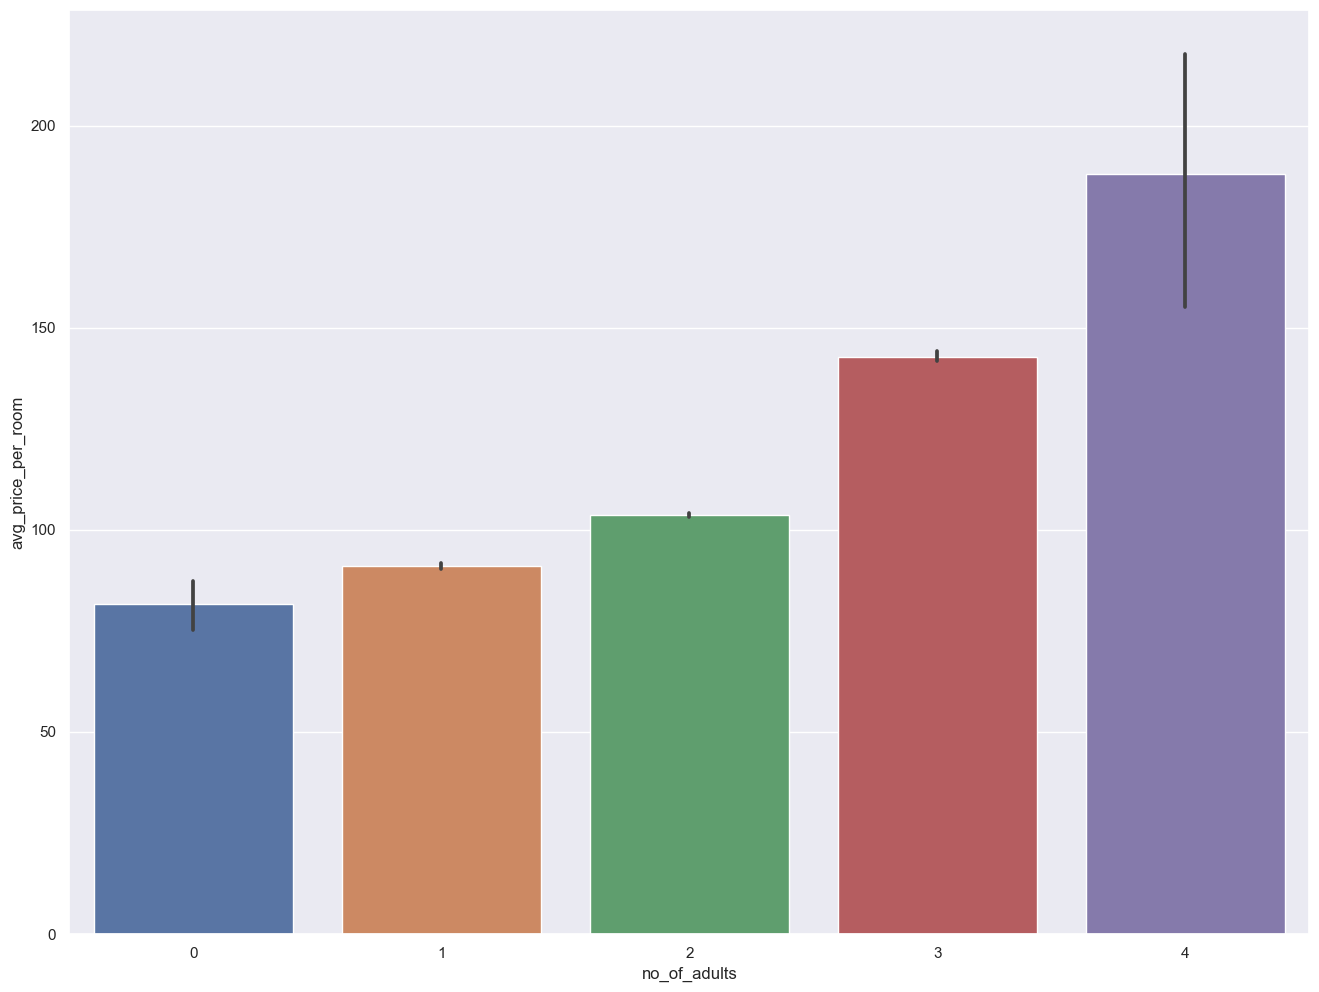

In [66]:
sb.barplot(data=hotel_df,x='no_of_adults',y='avg_price_per_room')

<AxesSubplot: xlabel='no_of_children', ylabel='avg_price_per_room'>

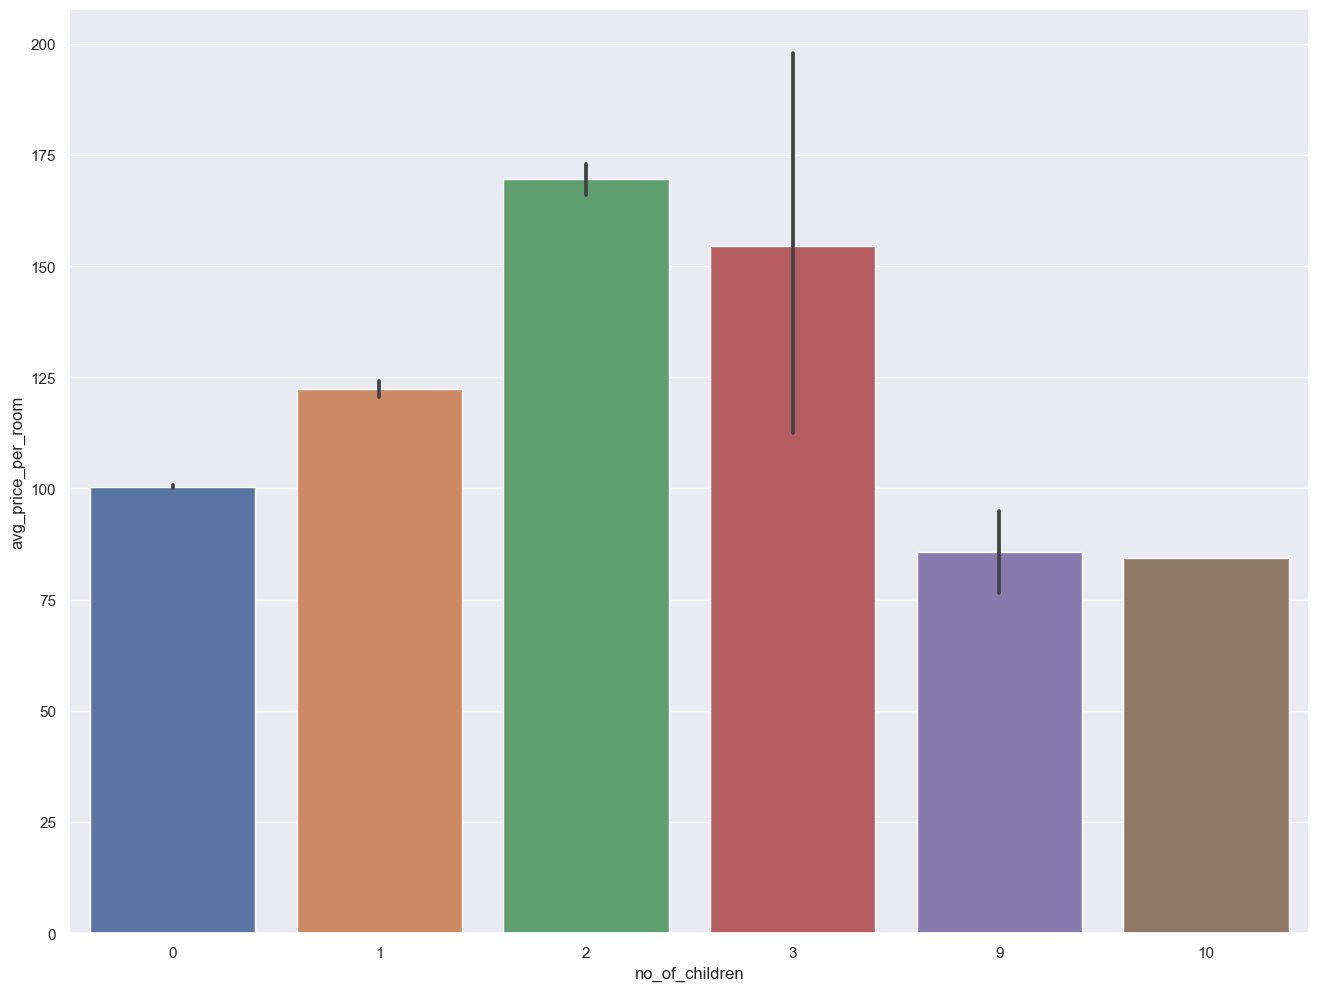

In [67]:
sb.barplot(data=hotel_df,x='no_of_children',y='avg_price_per_room')

#### What did these barplots reflect
These barplots are interesting as the **first one shows that as the number of adults increases, the room price tends to increase** as well. However, the number of children and room price has an odd variance in which 3 children varies wildly, and 9-10 children seems to have a lower price than 0 children. This can indicate group discounts or similar events.

#### Takeaways
The major takeaways from this EDA leading into the machine learning portion in part 2, are that lead times above **150 days tend to result in an increased level of cancellations, the majority of guests are online, and there are no attributes with high correlation to booking status**.